In [1]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
## Importing Dataset
bookings = pd.read_csv("Hotel Reservations.csv")

In [3]:
## Data Overview
bookings.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
## Data Info
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
## Checking null values
bookings.isnull().sum()  ## There are no missing values

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
bookings.shape

(36275, 19)

In [7]:
bookings.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [8]:
## Checking unique values in object type columns.
feature_list = bookings.columns
for i in feature_list:
    if bookings[i].dtype == "object":
        print(f"{i}:{bookings[i].unique()}")

Booking_ID:['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
type_of_meal_plan:['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
room_type_reserved:['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market_segment_type:['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
booking_status:['Not_Canceled' 'Canceled']


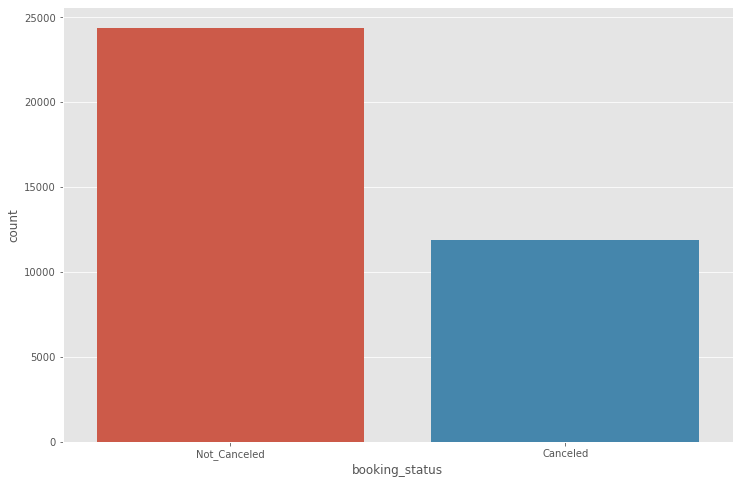

In [9]:
## Booking Status
sns.countplot(x=bookings["booking_status"]);

In [10]:
bookings["booking_status"].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [11]:
## Creating a new variable called "Family Size"
bookings["Family_Size"] = bookings["no_of_adults"]+bookings["no_of_children"]

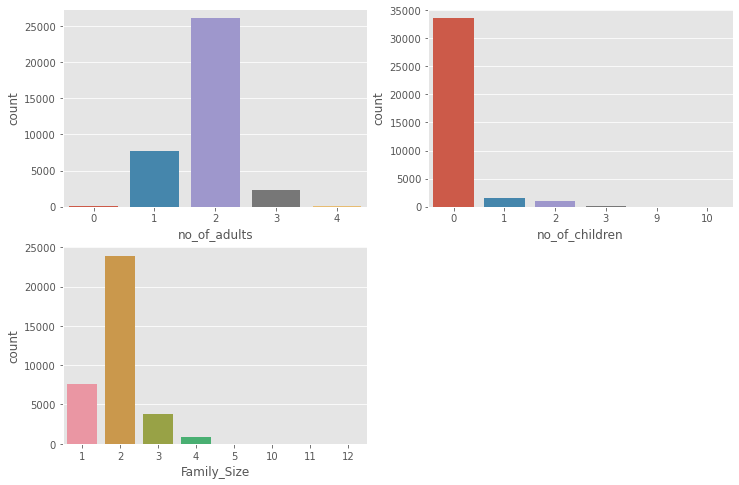

In [12]:
feature_list = ["no_of_adults","no_of_children","Family_Size"]
for i in range(len(feature_list)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=bookings[feature_list[i]]);

In [13]:
bookings["Family_Size"].value_counts()

2     23942
1      7552
3      3851
4       912
5        15
12        1
10        1
11        1
Name: Family_Size, dtype: int64

In [14]:
## Creating a new Feature
bookings["Stay Duration"] = bookings["no_of_weekend_nights"] + bookings["no_of_week_nights"]

<AxesSubplot:xlabel='type_of_meal_plan', ylabel='count'>

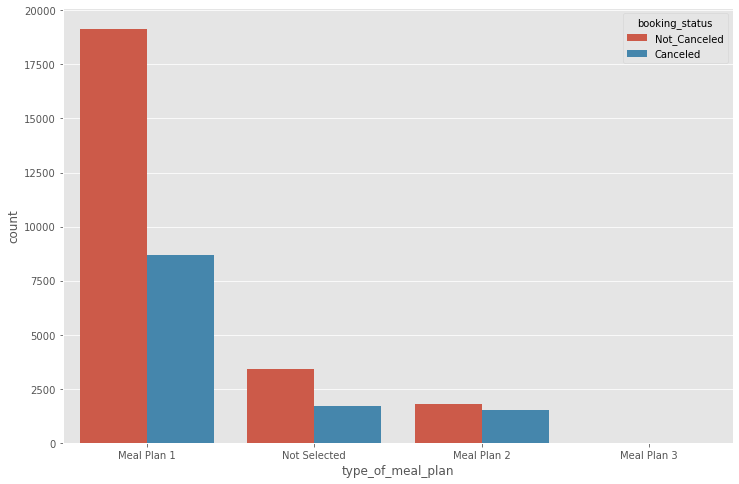

In [15]:
## Comparing Meal Plan with cancellation
sns.countplot(x=bookings["type_of_meal_plan"],hue=bookings["booking_status"])

In [16]:
bookings["type_of_meal_plan"].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

<AxesSubplot:xlabel='required_car_parking_space', ylabel='count'>

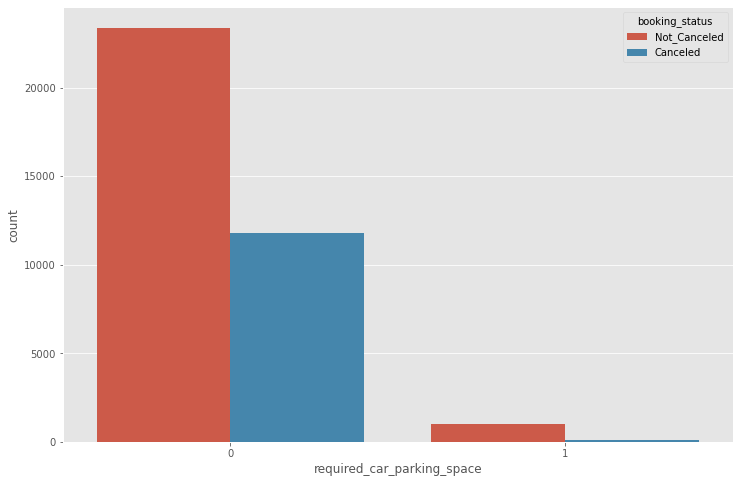

In [17]:
sns.countplot(x=bookings["required_car_parking_space"],hue=bookings["booking_status"])

In [18]:
bookings.groupby("booking_status")["type_of_meal_plan"].value_counts()

booking_status  type_of_meal_plan
Canceled        Meal Plan 1           8679
                Not Selected          1699
                Meal Plan 2           1506
                Meal Plan 3              1
Not_Canceled    Meal Plan 1          19156
                Not Selected          3431
                Meal Plan 2           1799
                Meal Plan 3              4
Name: type_of_meal_plan, dtype: int64

<AxesSubplot:xlabel='arrival_year', ylabel='count'>

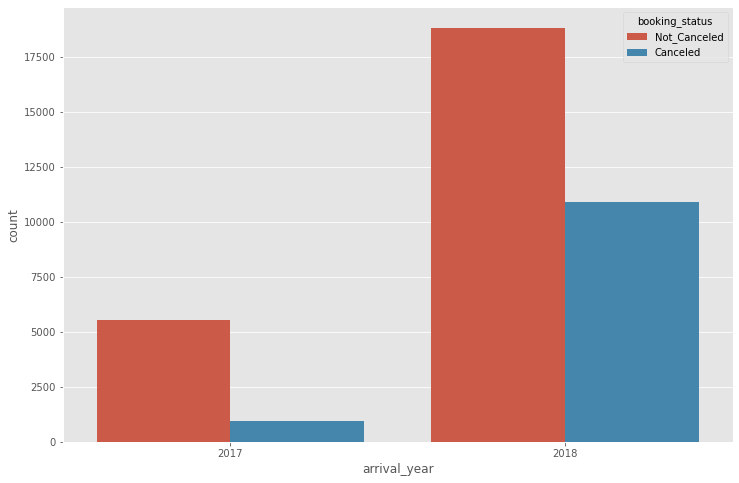

In [19]:
## No. of bookings year wise
sns.countplot(x= bookings["arrival_year"],hue=bookings["booking_status"])

In [20]:
pd.crosstab(bookings["arrival_year"],bookings["booking_status"])

booking_status,Canceled,Not_Canceled
arrival_year,,
2017,961,5553
2018,10924,18837


<AxesSubplot:xlabel='market_segment_type', ylabel='count'>

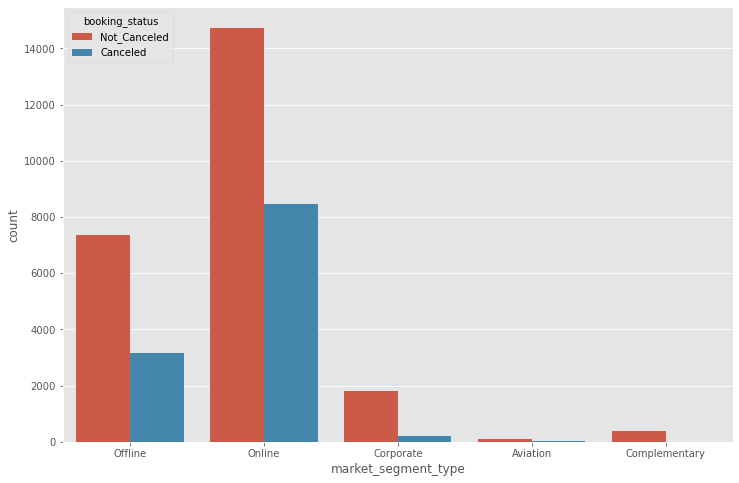

In [21]:
## Countplot
sns.countplot(x=bookings["market_segment_type"],hue=bookings["booking_status"])

In [22]:
bookings[(bookings["market_segment_type"]== "Online") & (bookings["arrival_year"] == 2018)]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Family_Size,Stay Duration
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,6,Online,0,0,0,106.68,1,Not_Canceled,2,5
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,28,Online,0,0,0,60.00,0,Canceled,1,3
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,20,Online,0,0,0,100.00,0,Canceled,2,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,11,Online,0,0,0,94.50,0,Canceled,2,2
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,...,13,Online,0,0,0,115.00,1,Canceled,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36269,INN36270,2,2,0,1,Meal Plan 1,0,Room_Type 6,0,2018,...,6,Online,0,0,0,216.00,0,Canceled,4,1
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,...,3,Online,0,0,0,167.80,1,Not_Canceled,3,8
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,...,17,Online,0,0,0,90.95,2,Canceled,2,4
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,...,1,Online,0,0,0,98.39,2,Not_Canceled,2,8


<AxesSubplot:xlabel='repeated_guest', ylabel='count'>

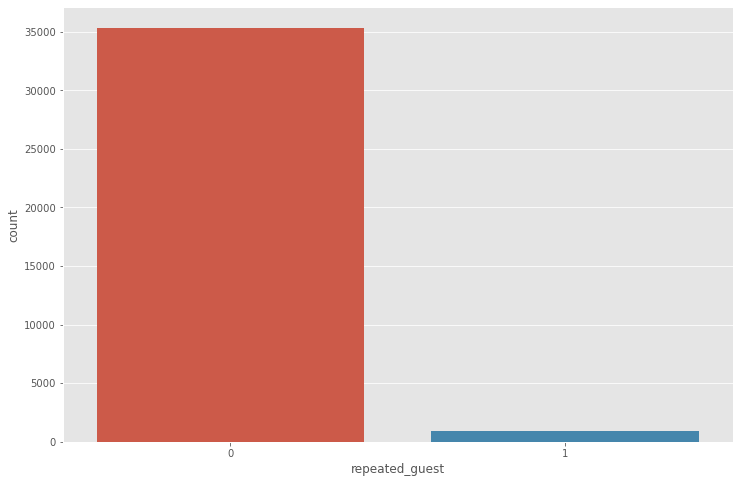

In [23]:
sns.countplot(x=bookings["repeated_guest"])

<AxesSubplot:xlabel='no_of_special_requests', ylabel='count'>

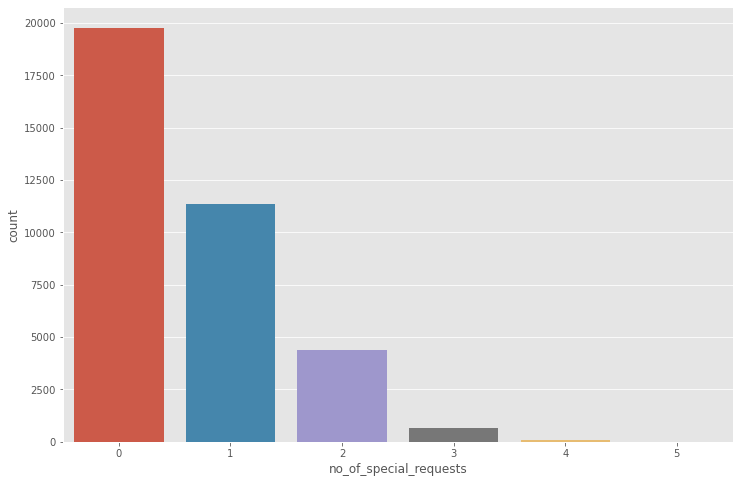

In [24]:
sns.countplot(x=bookings["no_of_special_requests"])

### Encoding

In [25]:
bookings["type_of_meal_plan"] = bookings["type_of_meal_plan"].replace({"Not Selected":-1,"Meal Plan 1":1,"Meal Plan 2":2,"Meal Plan 3":3})  ## There are not many entries with meal plan 3.

In [26]:
bookings["room_type_reserved"] = bookings["room_type_reserved"].replace({'Room_Type 1':1,'Room_Type 4':4,'Room_Type 2':2,'Room_Type 6':6,'Room_Type 5':5,'Room_Type 7':7,'Room_Type 3':3})

In [27]:
bookings["market_segment_type"] = bookings["market_segment_type"].replace({"Aviation":1,"Complementary":2,"Corporate":3,"Offline":4,"Online":5})

In [28]:
bookings["booking_status"] = bookings["booking_status"].replace({'Not_Canceled':0,'Canceled':1})

In [29]:
## Transforming the data
def treat_outlier(data,col):
    Q3,Q1 = np.quantile(data[col],[0.75,0.25])
    IQR = Q3-Q1
    UL = Q3+(1.5*IQR)
    LL = Q1-(1.5*IQR)
    return UL, LL

In [30]:
feature_list = ["lead_time","avg_price_per_room"]
for i in feature_list:
    UL, LL = treat_outlier(bookings,i)
    bookings[i] = np.where(bookings[i] > UL, UL, bookings[i])
    bookings[i] = np.where(bookings[i] < LL, LL, bookings[i])

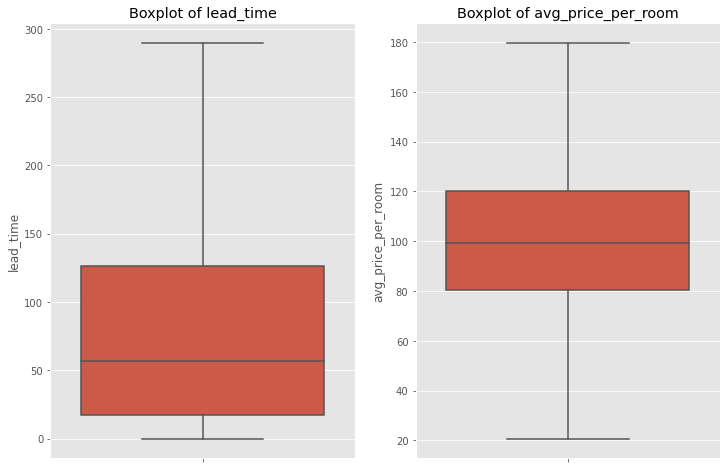

In [31]:
for i in range(len(feature_list)):
    plt.subplot(1,2,i+1)
    sns.boxplot(y=bookings[feature_list[i]])
    plt.title("Boxplot of {}".format(feature_list[i]))

In [32]:
## Dropping
bookings.drop(["Booking_ID"],axis=1,inplace=True)

In [33]:
bookings.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Family_Size,Stay Duration
0,2,0,1,2,1,0,1,224.0,2017,10,2,4,0,0,0,65.00,0,0,2,3
1,2,0,2,3,-1,0,1,5.0,2018,11,6,5,0,0,0,106.68,1,0,2,5
2,1,0,2,1,1,0,1,1.0,2018,2,28,5,0,0,0,60.00,0,1,1,3
3,2,0,0,2,1,0,1,211.0,2018,5,20,5,0,0,0,100.00,0,1,2,2
4,2,0,1,1,-1,0,1,48.0,2018,4,11,5,0,0,0,94.50,0,1,2,2


In [42]:
## Train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
x = bookings.drop("booking_status",axis=1)
y = bookings.pop("booking_status")

In [36]:
## Random forest
from sklearn.ensemble import RandomForestClassifier

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=5)

In [38]:
RF = RandomForestClassifier()

In [39]:
model_rf = RF.fit(x_train,y_train)

In [40]:
y_pred_rf = model_rf.predict(x_test)

<AxesSubplot:>

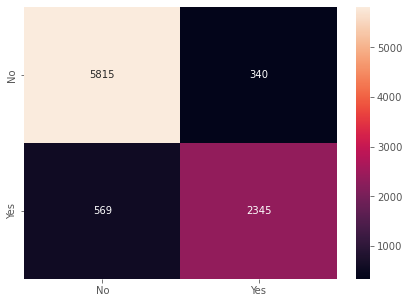

In [49]:
cm=confusion_matrix(y_test,y_pred_rf, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [44]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6155
           1       0.87      0.80      0.84      2914

    accuracy                           0.90      9069
   macro avg       0.89      0.87      0.88      9069
weighted avg       0.90      0.90      0.90      9069



In [50]:
## Feature selection
from sklearn.ensemble import ExtraTreesClassifier

In [51]:
clf = ExtraTreesClassifier()
clf = clf.fit(x_train,y_train)
importance_list = pd.DataFrame({"Features":x_train.columns,"Feature_Importance":clf.feature_importances_},columns=["Features","Feature_Importance"])

In [52]:
importance_list.sort_values(by="Feature_Importance",ascending=True)

,Features,Feature_Importance
13,no_of_previous_cancellations,0.000358
14,no_of_previous_bookings_not_canceled,0.000572
12,repeated_guest,0.003854
1,no_of_children,0.006438
5,required_car_parking_space,0.007277
0,no_of_adults,0.018419
6,room_type_reserved,0.019960
17,Family_Size,0.020286
4,type_of_meal_plan,0.024591
8,arrival_year,0.030035


In [53]:
## We will remove features one by one
x_train.drop("no_of_previous_cancellations",axis=1,inplace=True)

In [54]:
x_test.drop("no_of_previous_cancellations",axis=1,inplace=True)

In [55]:
model_rf_1 = RF.fit(x_train,y_train)

In [56]:
y_pred_rf_1 = model_rf_1.predict(x_test)

In [57]:
confusion_matrix(y_test,y_pred_rf_1)

array([[5813,  342],
       [ 568, 2346]], dtype=int64)

In [58]:
print(classification_report(y_test,y_pred_rf_1))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6155
           1       0.87      0.81      0.84      2914

    accuracy                           0.90      9069
   macro avg       0.89      0.87      0.88      9069
weighted avg       0.90      0.90      0.90      9069



In [69]:
def rf_model(x_train,x_test,y_train,y_test):
    RF = RandomForestClassifier()
    model_rf = RF.fit(x_train,y_train)
    y_pred_test = model_rf.predict(x_test)
    print(classification_report(y_test,y_pred_test))

In [60]:
x_train.drop(["no_of_previous_bookings_not_canceled","repeated_guest","required_car_parking_space","no_of_children"],axis=1,inplace=True)
x_test.drop(["no_of_previous_bookings_not_canceled","repeated_guest","required_car_parking_space","no_of_children"],axis=1,inplace=True)

In [61]:
rf_model(x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      6155
           1       0.88      0.80      0.84      2914

    accuracy                           0.90      9069
   macro avg       0.89      0.87      0.88      9069
weighted avg       0.90      0.90      0.90      9069



In [62]:
## Let do grid search CV
from sklearn.model_selection import GridSearchCV

In [63]:
x_train.drop(["no_of_adults"],axis=1,inplace=True)
x_test.drop(["no_of_adults"],axis=1,inplace=True)

In [70]:
rf_model(x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6155
           1       0.87      0.81      0.84      2914

    accuracy                           0.90      9069
   macro avg       0.89      0.88      0.88      9069
weighted avg       0.90      0.90      0.90      9069



In [71]:
param_grid = {"criterion":["gini", "entropy", "log_loss"],
             "max_depth":[10,20,30,40,50],
             "max_features":[6,8,12]}

In [72]:
grid_search = GridSearchCV(estimator=RF,param_grid = param_grid,n_jobs=-1)

In [73]:
model_grid = grid_search.fit(x_train,y_train)

In [74]:
model_grid.best_params_

{'criterion': 'log_loss', 'max_depth': 20, 'max_features': 6}

In [75]:
y_pred_grid = model_grid.predict(x_test)

In [76]:
print(classification_report(y_test,y_pred_grid))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      6155
           1       0.86      0.81      0.83      2914

    accuracy                           0.90      9069
   macro avg       0.88      0.87      0.88      9069
weighted avg       0.89      0.90      0.89      9069



In [77]:
from sklearn.naive_bayes import GaussianNB

In [79]:
GB = GaussianNB()

In [80]:
model_GB = GB.fit(x_train,y_train)

In [81]:
y_pred_GB = model_GB.predict(x_test)

<AxesSubplot:>

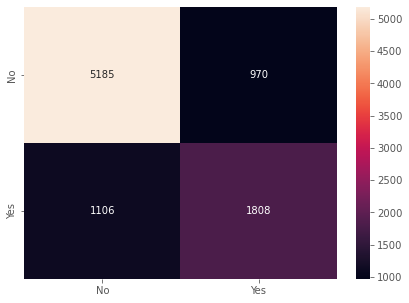

In [82]:
cm=confusion_matrix(y_test,y_pred_GB, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [83]:
print(classification_report(y_test,y_pred_GB))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      6155
           1       0.65      0.62      0.64      2914

    accuracy                           0.77      9069
   macro avg       0.74      0.73      0.73      9069
weighted avg       0.77      0.77      0.77      9069



END